In [1]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import csv
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction
from Bio import SeqIO

In [2]:
os.chdir("C:/Users/User/Desktop/USP/Projeto/") #Diretório

In [3]:
input_fasta = "raw/sequences.fasta"
input_csv = "sheets/sequences.csv"

In [4]:
df=pd.read_csv(input_csv)

In [5]:
df.head()

,Accession,Organism_Name,Species,Genus,Family,Molecule_type,Length,Country,Host
0,NC_077837.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,1198,USA,Homo sapiens
1,NC_077838.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,1196,USA,Homo sapiens
2,NC_077839.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,3860,USA,Homo sapiens
3,NC_077840.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,3916,USA,Homo sapiens
4,NC_077841.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,2304,USA,Homo sapiens


In [6]:
print("Shape of the Dataset: {}".format(df.shape))

Shape of the Dataset: (72731, 9)


In [7]:
#remover famílias que são de fagos

familia_remover = ["Intestiviridae","Chuviridae", "Steigviridae","Nodaviridae","Blumeviridae"]
df_filtrado = df[~df["Family"].isin(familia_remover)]
df_filtrado = df_filtrado.dropna(subset=['Family'])
df_filtrado.to_csv("Family_Metadata.csv", index=False)

df_filtrado.head()
#df_filtrado[df_filtrado["Family"] == "Blumeviridae"]

,Accession,Organism_Name,Species,Genus,Family,Molecule_type,Length,Country,Host
0,NC_077837.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,1198,USA,Homo sapiens
1,NC_077838.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,1196,USA,Homo sapiens
2,NC_077839.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,3860,USA,Homo sapiens
3,NC_077840.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,3916,USA,Homo sapiens
4,NC_077841.1,Mammalian orthoreovirus 3 Dearing,Mammalian orthoreovirus,Orthoreovirus,Spinareoviridae,dsRNA,2304,USA,Homo sapiens


In [8]:
df_filtrado.groupby('Family').nunique()

,Accession,Organism_Name,Species,Genus,Molecule_type,Length,Country,Host
Family,,,,,,,,
Adenoviridae,1721,86,10,1,1,587,35,1
Anelloviridae,3394,64,60,7,1,678,20,1
Arenaviridae,108,8,7,1,1,72,11,1
Astroviridae,130,32,16,1,1,82,21,1
Bornaviridae,36,4,2,1,1,19,1,1
Caliciviridae,1402,611,5,2,1,201,29,1
Circoviridae,77,33,31,2,1,38,19,1
Coronaviridae,921,22,11,3,1,384,28,1
Filoviridae,545,12,6,2,1,121,19,1


In [11]:
print(df['Family'].value_counts().nunique())

38


In [10]:
print(df_filtrado['Family'].isna().sum())

0


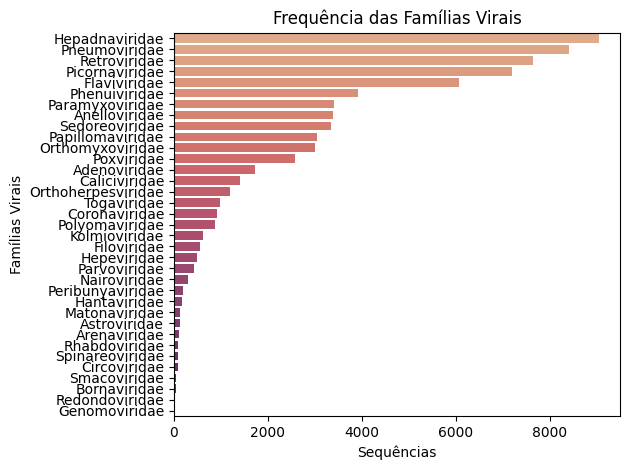

In [13]:
familias = df_filtrado["Family"].value_counts().reset_index()
familias.columns = ["Family", "Count"]

# gráfico de barras
sns.barplot(data=familias, x="Count", y="Family", palette="flare", hue = "Family")

plt.title("Frequência das Famílias Virais")
plt.xlabel("Sequências")
plt.ylabel("Famílias Virais")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [18]:
ids_filtrados = set(df_filtrado["Accession"])

# Ler o arquivo FASTA original
output_fasta = "Familias.fasta"

# Filtrar as sequências
with open(output_fasta, "w") as output_handle:
    for record in SeqIO.parse(input_fasta, "fasta"):
        if record.id in ids_filtrados:
            SeqIO.write(record, output_handle, "fasta")

Filtrando as famílias (3 + fagos)

In [44]:
familias_interesse = ["Anelloviridae", "Picornaviridae", "Pneumoviridae"]
df_filtrado = df[df["Family"].isin(familias_interesse)]

df_filtrado.head()
df_filtrado.to_csv("filtered_metadata.csv", index=False)

In [43]:
# Criar uma lista de IDs (Accessions) das famílias filtradas
ids_filtrados = set(df_filtrado["Accession"])

# Ler o arquivo FASTA original
output_fasta = "filtered_sequences.fasta"

# Filtrar as sequências
with open(output_fasta, "w") as output_handle:
    for record in SeqIO.parse(input_fasta, "fasta"):
        if record.id in ids_filtrados:
            SeqIO.write(record, output_handle, "fasta")

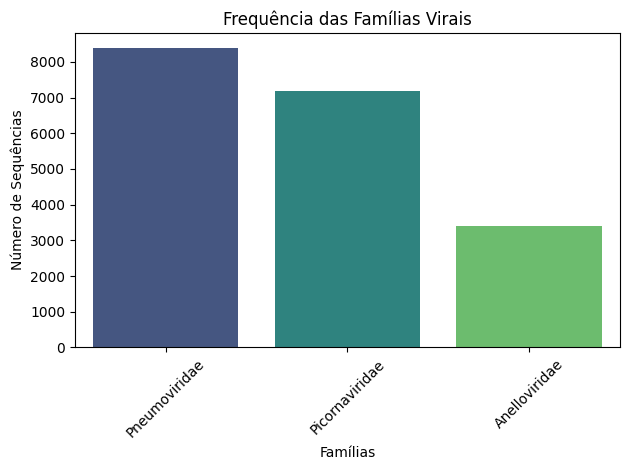

In [46]:
familias_contagem = df_filtrado["Family"].value_counts().reset_index()
familias_contagem.columns = ["Family", "Count"]

# gráfico de barras
sns.barplot(data=familias_contagem, x="Family", y="Count", palette="viridis", hue = "Family")

plt.title("Frequência das Famílias Virais")
plt.xlabel("Famílias")
plt.ylabel("Número de Sequências")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [54]:
new_fasta = "processed/filtered_sequences.fasta"
gc_data = []

# Calcular o conteúdo de GC
for record in SeqIO.parse(new_fasta, "fasta"):
    gc_content = gc_fraction(record.seq) * 100  # Calcular GC e converter para %
    gc = round(gc_content, 2)  # Arredondar
    gc_data.append({"Accession": record.id, "GC_Content": gc})

# Criar um DataFrame
gc_df = pd.DataFrame(gc_data)

#gc_df.to_csv("gc_content.csv", index=False)

# Visualizar os primeiros resultados
print(gc_df.head())

     Accession  GC_Content
0  NC_075369.1       35.91
1  NC_075370.1       36.92
2  NC_075371.1       37.85
3  NC_075372.1       32.40
4  NC_075373.1       37.47


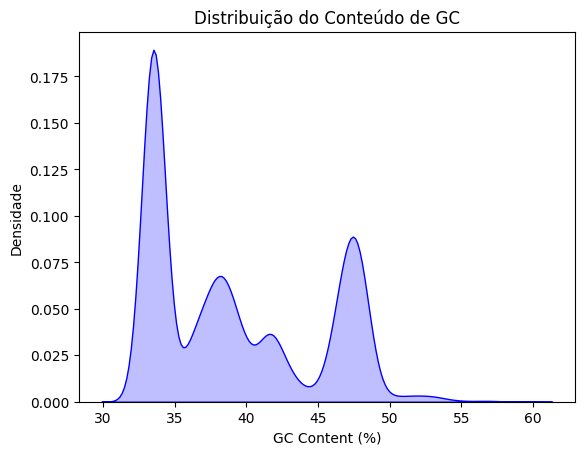

In [56]:
sns.kdeplot(gc_df["GC_Content"], fill=True, color="blue")
plt.title("Distribuição do Conteúdo de GC")
plt.xlabel("GC Content (%)")
plt.ylabel("Densidade")
plt.show()

In [59]:
filtered_metadata = pd.read_csv("sheets/filtered_metadata.csv")
gc_content = pd.read_csv("gc_content.csv")

# Mesclar os dois DataFrames usando 'Accession' como chave
merged_data = pd.merge(filtered_metadata, gc_content, on="Accession")

#merged_data.to_csv("Meta_GC.csv", index=False)

# Visualizar os primeiros registros
print(merged_data.head())

     Accession      Organism_Name            Species Genus         Family  \
0  NC_075369.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   
1  NC_075370.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   
2  NC_075371.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   
3  NC_075372.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   
4  NC_075373.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   

  Molecule_type  Length Country          Host  GC_Content  
0      ssDNA(-)    2381     USA  Homo sapiens       35.91  
1      ssDNA(-)    2668     USA  Homo sapiens       36.92  
2      ssDNA(-)    2536     USA  Homo sapiens       37.85  
3      ssDNA(-)    1744     USA  Homo sapiens       32.40  
4      ssDNA(-)    2810     USA  Homo sapiens       37.47  


In [3]:
meta_gc = pd.read_csv('sheets/Meta_GC.csv')

In [92]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=meta_gc, x="Family", y="GC_Content", palette="viridis", hue = "Family")
plt.title("Distribuição do Conteúdo de GC por Família")
plt.xlabel("Família")
plt.ylabel("GC Content (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'meta_gc' is not defined

<Figure size 1000x600 with 0 Axes>

In [9]:
new_fasta = "processed/filtered_sequences.fasta"
meta_gc = pd.read_csv('sheets/Meta_GC.csv')

In [81]:
def calc_tetranucleotide_frequency(sequence):
    # Gerar tetranucleotídeos
    tetranucleotides = [sequence[i:i+4] for i in range(len(sequence) - 3)]
    # Filtrar apenas os válidos
    valid_tetranucleotides = [tet for tet in tetranucleotides if set(tet).issubset({"A", "C", "G", "T"})]
    # Contar as frequências
    counts = Counter(valid_tetranucleotides)
    # Normalizar as frequências
    total = sum(counts.values())
    if total > 0:
        normalized_counts = {k: v / total for k, v in counts.items()}
    else:
        normalized_counts = 0
    return normalized_counts

In [20]:
from collections import Counter
FTN = []
for record in SeqIO.parse(new_fasta, "fasta"):
    freq_dict = calc_tetranucleotide_frequency(record.seq)
    freq_dict["Accession"] = record.id  # Adicionar o Accession como chave
    FTN.append(freq_dict)

In [21]:
tetranuc_df = pd.DataFrame(FTN)

In [22]:
merged_df = pd.merge(meta_gc, tetranuc_df, on="Accession")
print(merged_df.head())

     Accession      Organism_Name            Species Genus         Family  \
0  NC_075369.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   
1  NC_075370.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   
2  NC_075371.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   
3  NC_075372.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   
4  NC_075373.1  Anelloviridae sp.  Anelloviridae sp.   NaN  Anelloviridae   

  Molecule_type  Length Country          Host  GC_Content  ...  (G, T, T, G)  \
0      ssDNA(-)    2381     USA  Homo sapiens       35.91  ...           NaN   
1      ssDNA(-)    2668     USA  Homo sapiens       36.92  ...      0.009006   
2      ssDNA(-)    2536     USA  Homo sapiens       37.85  ...      0.006317   
3      ssDNA(-)    1744     USA  Homo sapiens       32.40  ...      0.013211   
4      ssDNA(-)    2810     USA  Homo sapiens       37.47  ...      0.001069   

   (C, G, G, T)  (A, G, C, G)  (G, C, G, A)  (G, C, G, T

In [24]:
merged_df.fillna(0, inplace=True)

In [27]:
merged_df[merged_df['Genus'] == 'Betatorquevirus']

,Accession,Organism_Name,Species,Genus,Family,Molecule_type,Length,Country,Host,GC_Content,...,"(G, T, T, G)","(C, G, G, T)","(A, G, C, G)","(G, C, G, A)","(G, C, G, T)","(T, C, G, G)","(A, T, C, G)","(C, G, T, G)","(C, A, C, G)","(C, T, C, G)"
13,NC_076131.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2915,France,Homo sapiens,39.86,...,0.001374,0.000687,0.001374,0.001030,0.000000,0.000687,0.000343,0.000000,0.000687,0.000000
14,NC_076135.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2853,Netherlands,Homo sapiens,36.83,...,0.000356,0.001425,0.001068,0.000712,0.000000,0.001425,0.000712,0.000000,0.000356,0.000712
15,NC_076155.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2830,USA,Homo sapiens,37.31,...,0.000354,0.000000,0.001061,0.000707,0.000707,0.001061,0.000354,0.001061,0.000707,0.001061
16,NC_076156.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2938,USA,Homo sapiens,36.39,...,0.000681,0.000341,0.000681,0.000681,0.001022,0.000341,0.000000,0.000681,0.000681,0.000341
17,NC_076162.1,Torque teno mini virus SHA,Betatorquevirus homini26,Betatorquevirus,Anelloviridae,ssDNA(-),2880,China,Homo sapiens,38.19,...,0.000695,0.001043,0.001390,0.001390,0.000695,0.001390,0.001043,0.000348,0.001390,0.001043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18963,AF291073.1,Torque teno mini virus 8,Betatorquevirus homini8,Betatorquevirus,Anelloviridae,ssDNA(-),2910,France,Homo sapiens,37.80,...,0.000344,0.000000,0.001376,0.001032,0.000000,0.001720,0.001376,0.000000,0.000344,0.000344
18964,AB041962.1,Torque teno mini virus 5,Betatorquevirus homini5,Betatorquevirus,Anelloviridae,ssDNA(-),2908,0,Homo sapiens,37.10,...,0.000344,0.000344,0.000344,0.000344,0.000000,0.000344,0.000344,0.000000,0.001033,0.000000
18965,AB026929.1,Torque teno mini virus 6,Betatorquevirus homini6,Betatorquevirus,Anelloviridae,ssDNA(-),2897,0,Homo sapiens,37.38,...,0.001037,0.001382,0.000691,0.000346,0.000000,0.000691,0.000346,0.000346,0.000691,0.000691
18966,AB026930.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2860,0,Homo sapiens,37.83,...,0.000350,0.000700,0.001400,0.001400,0.000350,0.001050,0.001050,0.000000,0.001400,0.000350


In [30]:
merged_df=merged_df.drop_duplicates()

In [32]:
merged_df.to_csv('sheets/Meta_GC_FTN.csv')

FAGOS

In [33]:
input_fasta_phage = "raw/phages.fasta"
input_csv_phage = "sheets/phage.csv"

In [63]:
fagos=pd.read_csv(input_csv_phage)
fagos.head()

,Accession,Organism_Name,Species,Genus,Family,Molecule_type,Length,Country,Host
0,NC_079174.1,Erwinia phage Fifi44,Erwinia phage Fifi44,Loessnervirus,Chaseviridae,dsDNA,53559,South Korea,Erwinia amylovora
1,NC_079175.1,Escherichia phage PO103-1,Escherichia phage PO103-1,NaN,Chaseviridae,dsDNA,53040,China,Escherichia coli
2,NC_079176.1,Escherichia phage MLP1,Escherichia phage MLP1,NaN,Chaseviridae,dsDNA,51940,Chile,Escherichia coli CFT073
3,NC_079177.1,Yersinia phage PYps3T,Yersinia phage PYps3T,NaN,Chaseviridae,dsDNA,52854,Germany,Yersinia pseudotuberculosis
4,NC_079178.1,Yersinia phage PYps23T,Yersinia phage PYps23T,NaN,Chaseviridae,dsDNA,54869,Germany,Yersinia pseudotuberculosis


In [64]:
print(fagos['Family'].value_counts())

Autographiviridae    3202
Straboviridae        2771
Herelleviridae        965
Kyanoviridae          849
Drexlerviridae        774
                     ... 
Pyrstoviridae           2
Helgolandviridae        2
Aoguangviridae          1
Ahpuchviridae           1
Pungoviridae            1
Name: Family, Length: 61, dtype: int64


In [92]:
familias_interesse = ["Autographiviridae", "Straboviridae"]
fago_filtrado = fagos[(fagos["Family"].isin(familias_interesse)) & (fagos["Length"] > 50000)]

fago_filtrado.head()
#fago_filtrado.to_csv("filtered_phage.csv", index=False)

,Accession,Organism_Name,Species,Genus,Family,Molecule_type,Length,Country,Host
487,NC_070776.1,Kosakonia phage 305,Kanagawavirus threeohfive,Kanagawavirus,Straboviridae,dsDNA,174783,Czech Republic,Kosakonia cowanii
488,NC_070777.1,Enterobacter phage vB_EhoM-IME523,Kanagawavirus eclm,Kanagawavirus,Straboviridae,dsDNA,172763,China,Enterobacter hormaechei
489,NC_070778.1,Enterobacter phage vB_EclM_Q7622,Kanagawavirus mime,Kanagawavirus,Straboviridae,dsDNA,173871,China,Enterobacter cloacae
490,NC_070779.1,Salmonella phage KM16,Moonvirus kayemsixteen,Moonvirus,Straboviridae,dsDNA,170126,NaN,Salmonella enterica subsp. enterica serovar Pa...
491,NC_070780.1,Escherichia phage vB_EcoM_RZ,Gaprivervirus arezed,Gaprivervirus,Straboviridae,dsDNA,170318,China,Escherichia coli str. K-12 substr. MG1655


In [93]:
id_fago = set(fago_filtrado["Accession"])

# Ler o arquivo FASTA original
output_fasta = "processed/fago_filtrado.fasta"

# Filtrar as sequências
with open(output_fasta, "w") as output_handle:
    for record in SeqIO.parse(input_fasta_phage, "fasta"):
        if record.id in id_fago:
            SeqIO.write(record, output_handle, "fasta")

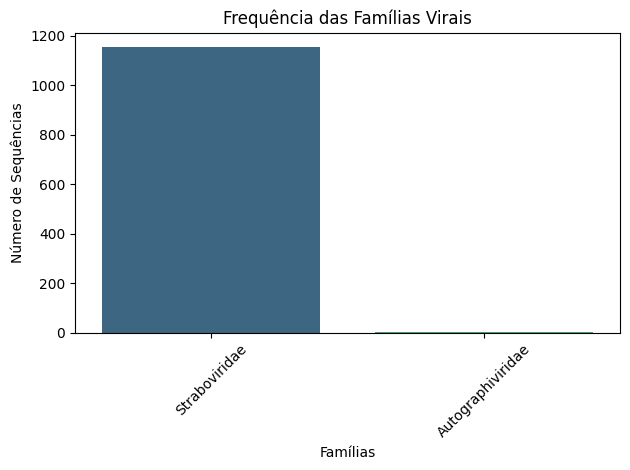

In [94]:
familias_contagem = fago_filtrado["Family"].value_counts().reset_index()
familias_contagem.columns = ["Family", "Count"]

# gráfico de barras
sns.barplot(data=familias_contagem, x="Family", y="Count", palette="viridis", hue = "Family")

plt.title("Frequência das Famílias Virais")
plt.xlabel("Famílias")
plt.ylabel("Número de Sequências")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [95]:
new_fago = "processed/fago_filtrado.fasta"
gc_fago = []

# Calcular o conteúdo de GC
for record in SeqIO.parse(new_fago, "fasta"):
    gc_content = gc_fraction(record.seq) * 100  # Calcular GC e converter para %
    gc = round(gc_content, 2)  # Arredondar
    gc_fago.append({"Accession": record.id, "GC_Content": gc})

# Criar um DataFrame
gc_fago_df = pd.DataFrame(gc_fago)

#gc_df.to_csv("gc_content.csv", index=False)

# Visualizar os primeiros resultados
print(gc_fago_df.head())

     Accession  GC_Content
0  NC_070776.1       40.02
1  NC_070777.1       39.97
2  NC_070778.1       40.02
3  NC_070779.1       38.61
4  NC_070780.1       40.15


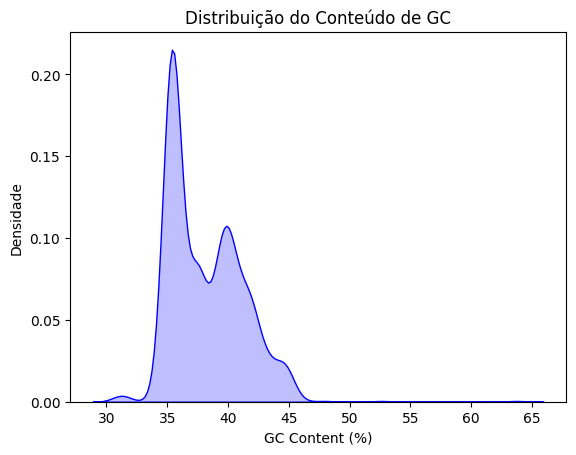

In [96]:
sns.kdeplot(gc_fago_df["GC_Content"], fill=True, color="blue")
plt.title("Distribuição do Conteúdo de GC")
plt.xlabel("GC Content (%)")
plt.ylabel("Densidade")
plt.show()

In [97]:
# Mesclar os dois DataFrames usando 'Accession' como chave
merged_data = pd.merge(fago_filtrado, gc_fago_df, on="Accession")

#merged_data.to_csv("Meta_GC.csv", index=False)

# Visualizar os primeiros registros
print(merged_data.head())

     Accession                      Organism_Name                    Species  \
0  NC_070776.1                Kosakonia phage 305  Kanagawavirus threeohfive   
1  NC_070777.1  Enterobacter phage vB_EhoM-IME523         Kanagawavirus eclm   
2  NC_070778.1   Enterobacter phage vB_EclM_Q7622         Kanagawavirus mime   
3  NC_070779.1              Salmonella phage KM16     Moonvirus kayemsixteen   
4  NC_070780.1       Escherichia phage vB_EcoM_RZ       Gaprivervirus arezed   

           Genus         Family Molecule_type  Length         Country  \
0  Kanagawavirus  Straboviridae         dsDNA  174783  Czech Republic   
1  Kanagawavirus  Straboviridae         dsDNA  172763           China   
2  Kanagawavirus  Straboviridae         dsDNA  173871           China   
3      Moonvirus  Straboviridae         dsDNA  170126             NaN   
4  Gaprivervirus  Straboviridae         dsDNA  170318           China   

                                                Host  GC_Content  
0            

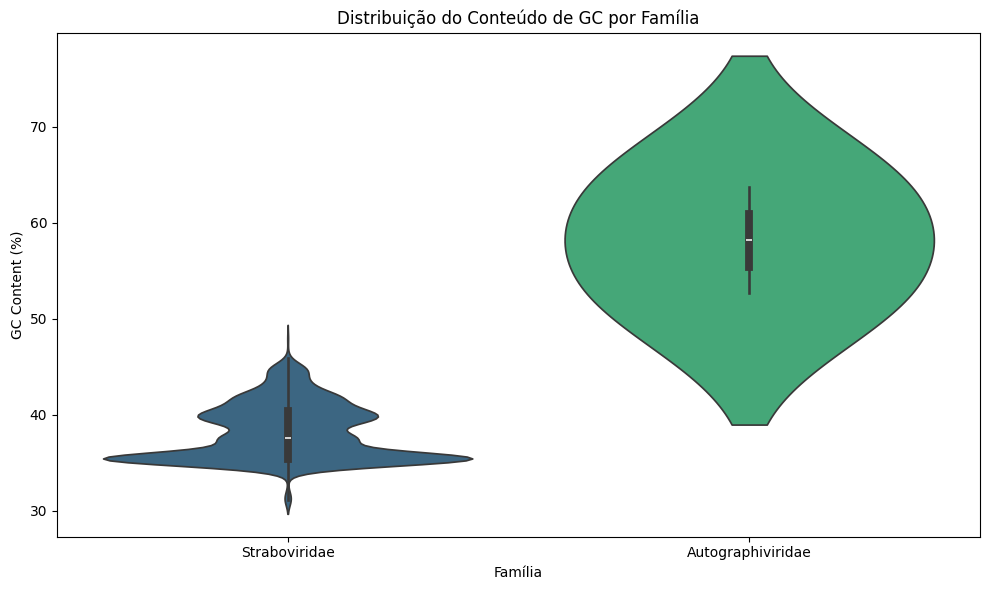

In [98]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data, x="Family", y="GC_Content", palette="viridis", hue = "Family")
plt.title("Distribuição do Conteúdo de GC por Família")
plt.xlabel("Família")
plt.ylabel("GC Content (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [99]:
FTN_fago = []
for record in SeqIO.parse(new_fago, "fasta"):
    freq_dict = calc_tetranucleotide_frequency(record.seq)
    freq_dict["Accession"] = record.id  # Adicionar o Accession como chave
    print("oi")
    FTN_fago.append(freq_dict)

oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
oi
o

In [100]:
tetra_fago = pd.DataFrame(FTN_fago)

In [101]:
tudo_fago = pd.merge(merged_data, tetra_fago, on="Accession")
print(tudo_fago.head())

     Accession                      Organism_Name                    Species  \
0  NC_070776.1                Kosakonia phage 305  Kanagawavirus threeohfive   
1  NC_070777.1  Enterobacter phage vB_EhoM-IME523         Kanagawavirus eclm   
2  NC_070778.1   Enterobacter phage vB_EclM_Q7622         Kanagawavirus mime   
3  NC_070779.1              Salmonella phage KM16     Moonvirus kayemsixteen   
4  NC_070780.1       Escherichia phage vB_EcoM_RZ       Gaprivervirus arezed   

           Genus         Family Molecule_type  Length         Country  \
0  Kanagawavirus  Straboviridae         dsDNA  174783  Czech Republic   
1  Kanagawavirus  Straboviridae         dsDNA  172763           China   
2  Kanagawavirus  Straboviridae         dsDNA  173871           China   
3      Moonvirus  Straboviridae         dsDNA  170126             NaN   
4  Gaprivervirus  Straboviridae         dsDNA  170318           China   

                                                Host  GC_Content  ...  \
0      

In [102]:
todos = pd.concat([merged_df, tudo_fago], ignore_index=True)

In [107]:
todos[todos['Genus'] == 'Kanagawavirus']

,Accession,Organism_Name,Species,Genus,Family,Molecule_type,Length,Country,Host,GC_Content,...,"(G, T, T, G)","(C, G, G, T)","(A, G, C, G)","(G, C, G, A)","(G, C, G, T)","(T, C, G, G)","(A, T, C, G)","(C, G, T, G)","(C, A, C, G)","(C, T, C, G)"
18975,NC_070776.1,Kosakonia phage 305,Kanagawavirus threeohfive,Kanagawavirus,Straboviridae,dsDNA,174783,Czech Republic,Kosakonia cowanii,40.02,...,0.003913,0.002449,0.001968,0.001997,0.001837,0.001997,0.003284,0.002037,0.003267,0.001642
18976,NC_070777.1,Enterobacter phage vB_EhoM-IME523,Kanagawavirus eclm,Kanagawavirus,Straboviridae,dsDNA,172763,China,Enterobacter hormaechei,39.97,...,0.003930,0.002709,0.001945,0.001852,0.001881,0.001864,0.003085,0.001985,0.003294,0.001522
18977,NC_070778.1,Enterobacter phage vB_EclM_Q7622,Kanagawavirus mime,Kanagawavirus,Straboviridae,dsDNA,173871,China,Enterobacter cloacae,40.02,...,0.004089,0.002628,0.001979,0.002007,0.001852,0.001904,0.003100,0.001990,0.003255,0.001564
19075,NC_048849.1,Enterobacter phage vB_EclM_CIP9,Kanagawavirus cipnine,Kanagawavirus,Straboviridae,dsDNA,174924,NaN,Enterobacter cloacae,39.93,...,0.003842,0.002533,0.002018,0.001755,0.001949,0.001732,0.003150,0.002127,0.003281,0.001601
19124,NC_028683.1,Edwardsiella phage PEi20,Kanagawavirus pei20,Kanagawavirus,Straboviridae,dsDNA,177643,NaN,Edwardsiella ictaluri,40.64,...,0.004200,0.002832,0.001813,0.001891,0.001599,0.002263,0.003468,0.002319,0.003546,0.001649
19478,ON630910.1,Enterobacter phage Entb_45,Enterobacter phage Entb_45,Kanagawavirus,Straboviridae,dsDNA,172771,Poland,Enterobacter cloacae,40.03,...,0.003890,0.002581,0.002078,0.001846,0.001881,0.001829,0.003172,0.002084,0.003369,0.001603
19566,OL355124.1,Enterobacter phage ENC9,Enterobacter phage ENC9,Kanagawavirus,Straboviridae,dsDNA,173639,USA,Enterobacter cloacae,40.05,...,0.004020,0.002655,0.001975,0.001883,0.001860,0.001895,0.003104,0.002131,0.003248,0.001618
19580,OL989991.1,Enterobacter phage vB_EclM_Q7622,Kanagawavirus mime,Kanagawavirus,Straboviridae,dsDNA,173871,China,Enterobacter cloacae,40.02,...,0.004089,0.002628,0.001979,0.002007,0.001852,0.001904,0.003100,0.001990,0.003255,0.001564
19609,MZ348423.1,Kosakonia phage 305,Kosakonia phage 305,Kanagawavirus,Straboviridae,dsDNA,174783,Czech Republic,Kosakonia cowanii,40.02,...,0.003913,0.002449,0.001968,0.001997,0.001837,0.001997,0.003284,0.002037,0.003267,0.001642
19791,MN882610.1,Enterobacter phage vB_EclM_CIP9,Kanagawavirus cipnine,Kanagawavirus,Straboviridae,dsDNA,174924,NaN,Enterobacter cloacae,39.93,...,0.003842,0.002533,0.002018,0.001755,0.001949,0.001732,0.003150,0.002127,0.003281,0.001601


In [108]:
todos = todos.drop_duplicates()

In [111]:
todos.to_csv('sheets/Final_biopython.csv')

In [104]:
df = pd.read_csv("sheets/Metadata_Final.csv")

In [105]:
df.head()

,Unnamed: 0,Accession,Organism_Name,Species,Genus,Family,Molecule_type,Length,Country,Host,...,Zn-ribbon_8,cREC_REC,dCMP_cyt_deam_1,dUTPase,gp12-short_mid,gp32,gp37_C,gp45-slide_C,motB,zf-dskA_traR
0,0,NC_075375.1,Anelloviridae sp.,Anelloviridae sp.,0,Anelloviridae,ssDNA(-),2368,USA,Homo sapiens,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,NC_075380.1,Anelloviridae sp.,Anelloviridae sp.,0,Anelloviridae,ssDNA(-),2550,USA,Homo sapiens,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,NC_076131.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2915,France,Homo sapiens,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NC_076135.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2853,Netherlands,Homo sapiens,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NC_076155.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2830,USA,Homo sapiens,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
colunas_remover = ["Unnamed: 0"]
df = df.drop(columns=colunas_remover)
df = df[df['Family'] != 'Autographiviridae']
df.head()

,Accession,Organism_Name,Species,Genus,Family,Molecule_type,Length,Country,Host,GC_Content,...,Zn-ribbon_8,cREC_REC,dCMP_cyt_deam_1,dUTPase,gp12-short_mid,gp32,gp37_C,gp45-slide_C,motB,zf-dskA_traR
0,NC_075375.1,Anelloviridae sp.,Anelloviridae sp.,0,Anelloviridae,ssDNA(-),2368,USA,Homo sapiens,37.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NC_075380.1,Anelloviridae sp.,Anelloviridae sp.,0,Anelloviridae,ssDNA(-),2550,USA,Homo sapiens,35.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NC_076131.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2915,France,Homo sapiens,39.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NC_076135.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2853,Netherlands,Homo sapiens,36.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NC_076155.1,TTV-like mini virus,TTV-like mini virus,Betatorquevirus,Anelloviridae,ssDNA(-),2830,USA,Homo sapiens,37.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
df["Family"].value_counts()

Pneumoviridae     8373
Picornaviridae    2787
Anelloviridae     2278
Straboviridae     1155
Name: Family, dtype: int64

<Figure size 1000x600 with 0 Axes>

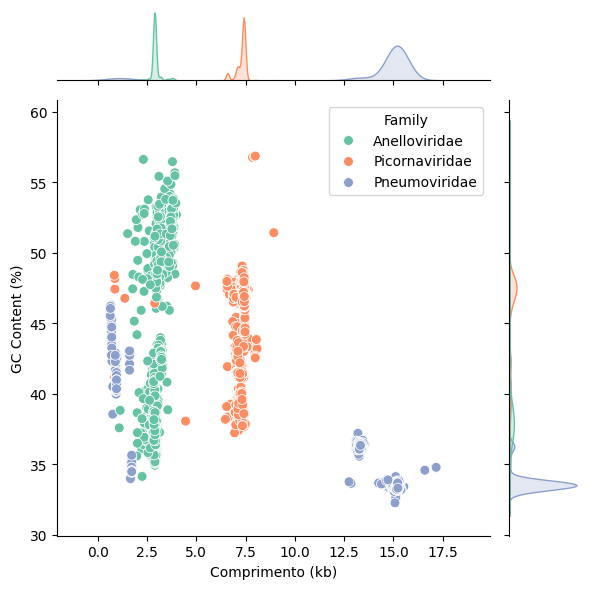

In [101]:
df["Length_kb"] = df["Length"] / 1000  # Convertendo para kilobases

plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x="Length_kb", y="GC_Content", palette="Set2", hue="Family", s=50)
plt.xlabel("Comprimento (kb)")
plt.ylabel("GC Content (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("4Families_jointplot.svg", dpi = 900)
plt.show()

<Figure size 1000x600 with 0 Axes>

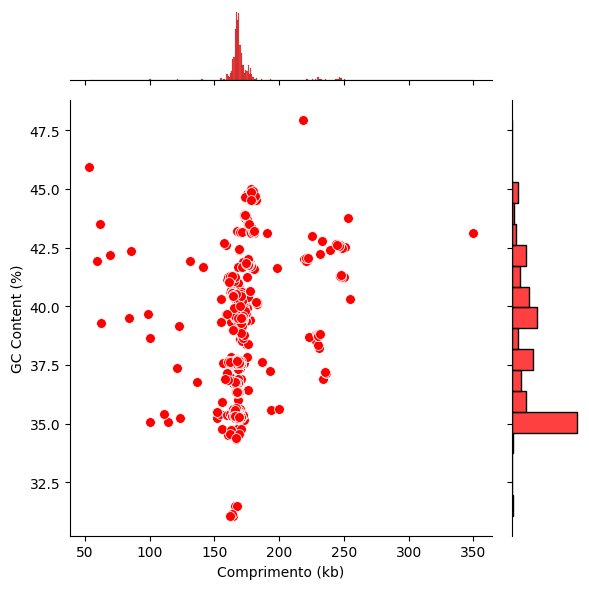

In [94]:
fago["Length_kb"] = fago["Length"] / 1000  
plt.figure(figsize=(10, 6))
sns.jointplot(data=fago, x="Length_kb", y="GC_Content", color = "red", s = 50)
plt.title("")
plt.xlabel("Comprimento (kb)")
plt.ylabel("GC Content (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("fago_jointplot.svg", dpi = 900)
plt.show()

In [118]:
df[(df["Family"] == "Pneumoviridae") & (df["Length"] < 3000)][["Family", "Length", "Accession"]]

,Family,Length,Accession
9905,Pneumoviridae,1725,MF426028.1
9906,Pneumoviridae,1725,MF426029.1
9907,Pneumoviridae,933,MF445662.1
9908,Pneumoviridae,933,MF445663.1
9909,Pneumoviridae,933,MF445664.1
...,...,...,...
13355,Pneumoviridae,1725,HQ317243.1
13403,Pneumoviridae,894,FJ157343.1
13404,Pneumoviridae,894,FJ157345.1
13405,Pneumoviridae,894,FJ157347.1
